In [ ]:
!pip install comet-ml

     |████████████████████████████████| 245kB 9.3MB/s 
     |████████████████████████████████| 204kB 14.3MB/s 
     |████████████████████████████████| 512kB 17.7MB/s 
  Created wheel for configobj: filename=configobj-5.0.6-cp36-none-any.whl size=34545 sha256=d835b8071d35a119d2ef0d335862387f1a48ca77c43319fdac868898f3a69b8f
  Stored in directory: /root/.cache/pip/wheels/f1/e4/16/4981ca97c2d65106b49861e0b35e2660695be7219a2d351ee0
Successfully built configobj


In [ ]:
from comet_ml import Experiment
experiment = Experiment(
    api_key='6JhNLsLXEsMpejFdH1y3Njut6',
    auto_metric_logging=True,
    auto_param_logging=True,
    auto_histogram_weight_logging=True,
    auto_histogram_gradient_logging=True,
    auto_histogram_activation_logging=True,
)


import torch
print(torch.cuda.is_available())
print(torch.cuda.get_device_capability())

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!wget https://www.dropbox.com/s/nx6o5zsjlr5rhod/IDA.zip

--2020-12-21 08:00:16--  https://www.dropbox.com/s/nx6o5zsjlr5rhod/IDA.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/nx6o5zsjlr5rhod/IDA.zip [following]
--2020-12-21 08:00:16--  https://www.dropbox.com/s/raw/nx6o5zsjlr5rhod/IDA.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc1af509703e961a1562d907ad2.dl.dropboxusercontent.com/cd/0/inline/BFdhaybaEroS11imrxUrJXdoN_zZd9nkKoWDQw6MFSOlaqXma9Tj0obo2qSS4CkueSG-oIXh60RnGsVXbfJhafviR-XQBqufvsnimfmqcMZ6ydw6l2Et-97tszQJE3G6ulM/file# [following]
--2020-12-21 08:00:17--  https://ucc1af509703e961a1562d907ad2.dl.dropboxusercontent.com/cd/0/inline/BFdhaybaEroS11imrxUrJXdoN_zZd9nkKoWDQw6MFSOlaqXma9Tj0obo2qSS4CkueSG-oIXh60RnGsVXbfJhafviR-XQBqufvsnimfmqcMZ6ydw6l2Et-97tszQJE3

In [ ]:
!wget https://www.dropbox.com/s/pj3kcpvx9nas5g3/loadbm.py

--2020-12-21 08:02:34--  https://www.dropbox.com/s/pj3kcpvx9nas5g3/loadbm.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/pj3kcpvx9nas5g3/loadbm.py [following]
--2020-12-21 08:02:34--  https://www.dropbox.com/s/raw/pj3kcpvx9nas5g3/loadbm.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9928f2a3e9f8d7a932e9268035.dl.dropboxusercontent.com/cd/0/inline/BFcINLZam2gEE9SQSPx7Kmw-_xNJ03rrO8CHN4B-fbU9FxQNP_aNNV3qHLB2kgBIq0TIEneYmSdnGZdsqdjWh5du8XH_4nq1ixPqE2pQGhfr5Y4-PdLraVh4GpN-ANtrYK0/file# [following]
--2020-12-21 08:02:35--  https://uc9928f2a3e9f8d7a932e9268035.dl.dropboxusercontent.com/cd/0/inline/BFcINLZam2gEE9SQSPx7Kmw-_xNJ03rrO8CHN4B-fbU9FxQNP_aNNV3qHLB2kgBIq0TIEneYmSdnGZdsqdjWh5du8XH_4nq1ixPqE2pQGhfr5Y4-PdLraVh4

In [ ]:
%%capture
!unzip IDA.zip

In [ ]:
!rm IDA.zip

In [ ]:
import numpy as np
import os
import ntpath
import platform
import matplotlib.pyplot as plt
from loadbm import create_df, create_tf_dataset, prepare_for_training


datapath = 'IDA/Separate lists with numbering/Machine learning splits'
img_path = 'IDA/Images/'

split = 1

train_fname = 'train'+str(split)+'.txt'
test_fname = 'test'+str(split)+'.txt'
val_fname = 'val'+str(split)+'.txt'

part_dat = False

df_train = create_df(os.path.join(datapath, train_fname),
                     img_path,
                     partial_dataset=part_dat,
                     seed=123)

df_test = create_df(os.path.join(datapath, test_fname),
                     img_path,
                     partial_dataset=part_dat,
                     seed=123)

df_val = create_df(os.path.join(datapath, val_fname),
                     img_path,
                     partial_dataset=part_dat,
                     seed=123)

from sklearn.utils import shuffle

df_train = shuffle(df_train)
df_val = shuffle(df_val)

df_train.head()

,path,label
295871,IDA/Images/Simuliidae536/1-Simuliidae536.1.201...,37
89552,IDA/Images/Ephemerella_muc27/0-Ephemerella_muc...,10
260143,IDA/Images/Polycentropus_fla162/0-Polycentropu...,31
131251,IDA/Images/Hydropsyche_sil373/0-Hydropsyche_si...,15
49840,IDA/Images/Elmis_aen129/0-Elmis_aen129.1.2016-...,8


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
IMSIZE = (224,224,3)
BATCH_SIZE = 128

train_ds = create_tf_dataset(df_train, imsize=IMSIZE, onehot=True)

val_ds = create_tf_dataset(df_val, imsize=IMSIZE, onehot=True)


train_ds = prepare_for_training(train_ds, 
                                shuffle_buffer_size=1000,
                                batch_size=BATCH_SIZE)

val_ds = prepare_for_training(val_ds, 
                              shuffle_buffer_size=1000,
                              batch_size=BATCH_SIZE)

for image, label in train_ds.take(5):
    print(image.shape)
    print(label.shape)


(128, 224, 224, 3)
(128, 39)
(128, 224, 224, 3)
(128, 39)
(128, 224, 224, 3)
(128, 39)
(128, 224, 224, 3)
(128, 39)
(128, 224, 224, 3)
(128, 39)


<BarContainer object of 39 artists>

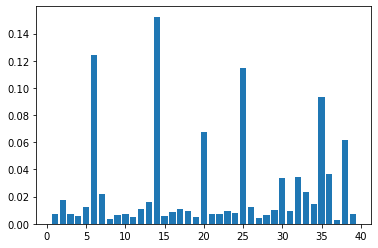

In [ ]:
import tensorflow.keras.backend as K

def weighted_crossentropy(alpha=1.0):

    def loss(y,yhat):
        
      y = K.cast(y, tf.float32)
      yhat = tf.convert_to_tensor(yhat, dtype=y.dtype)

      w_ce = -K.sum(y*K.log(yhat+1e-7)*alpha, axis=1)
      
      return w_ce

    return loss

alpha = np.histogram(df_train['label'], bins=39)[0]
alpha[alpha==0] = np.sort(alpha)[1]
alpha = 1 / alpha  
alpha /= alpha.sum() 

plt.bar(range(1,40),alpha)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D


def get_pretrained(imsize=(224, 224, 3), classes=39):
        base_model = InceptionV3(input_shape = imsize, 
                                 weights='imagenet', 
                                 include_top=False)
        
        base_model.trainable = True
        
        x = base_model.output
        x = GlobalAveragePooling2D()(x)
        x = Dense(256, activation='relu')(x)
        predictions = Dense(classes, activation='softmax')(x)
        
        model = Model(inputs=base_model.input, outputs=predictions)
        
        return model

model = get_pretrained()

loss = weighted_crossentropy(alpha=alpha) 

model.compile(optimizer = 'adam', loss = loss,
                  metrics=['accuracy'])

In [ ]:
!cp "/content/drive/My Drive/koulu_honmia/kandi19/39-xx-2020.h5" "/content/"

In [ ]:
model.load_weights('39-xx-2020.h5')
tr_steps = len(df_train)//BATCH_SIZE
val_steps = len(df_val)//BATCH_SIZE

In [ ]:
from tensorflow.keras.callbacks import CSVLogger
import datetime


tr_steps = len(df_train)//BATCH_SIZE
val_steps = len(df_val)//BATCH_SIZE

model.fit(train_ds, 
          validation_data= val_ds, 
          steps_per_epoch= tr_steps, 
          epochs = 10,
          validation_steps = val_steps)


Epoch 1/10


ValueError: ignored

In [ ]:
from tensorflow.keras.optimizers import Adam
adam = Adam(learning_rate=0.0001) #original 0.001

from tensorflow.keras.callbacks import LearningRateScheduler
def scheduler(epoch):
    return 0.0001 * tf.math.exp(0.1 * (-epoch))

lr_cb = LearningRateScheduler(scheduler)

model.compile(optimizer = adam, loss = loss,
                  metrics=['accuracy'])

model.fit(train_ds, 
          validation_data= val_ds, 
          steps_per_epoch= tr_steps, 
          epochs = 5,
          validation_steps = val_steps,
          callbacks=[lr_cb])

Epoch 1/5
10043/10043 [==============================] - 1648s 164ms/step - loss: 5.6656e-05 - accuracy: 0.9977 - val_loss: 0.0078 - val_accuracy: 0.9018 - lr: 1.0000e-04
Epoch 2/5
10043/10043 [==============================] - 1653s 165ms/step - loss: 2.4159e-05 - accuracy: 0.9989 - val_loss: 0.0088 - val_accuracy: 0.9032 - lr: 9.0484e-05
Epoch 3/5
10043/10043 [==============================] - 1657s 165ms/step - loss: 1.8350e-05 - accuracy: 0.9992 - val_loss: 0.0091 - val_accuracy: 0.9012 - lr: 8.1873e-05
Epoch 4/5
10043/10043 [==============================] - 1641s 163ms/step - loss: 1.3653e-05 - accuracy: 0.9994 - val_loss: 0.0091 - val_accuracy: 0.9033 - lr: 7.4082e-05
Epoch 5/5
10043/10043 [==============================] - 1639s 163ms/step - loss: 1.0384e-05 - accuracy: 0.9996 - val_loss: 0.0096 - val_accuracy: 0.9052 - lr: 6.7032e-05


In [ ]:
model.history.history

{'accuracy': [0.9976662993431091,
  0.9989296197891235,
  0.9992376565933228,
  0.9993994832038879,
  0.9996079206466675],
 'loss': [5.665624848916195e-05,
  2.415857306914404e-05,
  1.835032890085131e-05,
  1.3652674169861712e-05,
  1.0384318557044026e-05],
 'lr': [1e-04, 9.0483736e-05, 8.187308e-05, 7.4081814e-05, 6.7032e-05],
 'val_accuracy': [0.9017825722694397,
  0.9031990766525269,
  0.901172399520874,
  0.9033080339431763,
  0.9052257537841797],
 'val_loss': [0.00784209743142128,
  0.008808779530227184,
  0.009126507677137852,
  0.009069603867828846,
  0.0095578134059906]}

In [ ]:
model.save('39-x2-2020.h5')

In [ ]:
!cp '39-x2-2020.h5' "/content/drive/My Drive/koulu_honmia/kandi19/"

Evaluation:

In [ ]:
test_ds = create_tf_dataset(df_test, imsize=IMSIZE, onehot=True)
test_ds = test_ds.batch(BATCH_SIZE)

In [ ]:
!cp "/content/drive/My Drive/koulu_honmia/kandi19/benthic/combine_insects.py" /content/

In [ ]:
preds = model.predict(test_ds, verbose=True)
yhat = np.argmax(preds,axis=1)+1
y_test = df_test['label']

acc = np.sum(yhat==y_test)/len(y_test)
print('Image accuracy: {:.4f}'.format(acc))

np.save('39-x2-2020.npy', preds)

2897/2897 [==============================] - 172s 59ms/step
Image accuracy: 0.8954


In [ ]:
!cp '39-x2-2020.npy' "/content/drive/My Drive/koulu_honmia/kandi19/"

In [ ]:
#%% Insect combine
from combine_insects import add_insect_class, add_yhat

df_test_preds = add_insect_class(df_test)

# adding predictions to dataframe for insect-wise prediction
df_test_preds = add_yhat(df_test_preds,yhat)

dfg = df_test_preds.groupby(['label','insect'],as_index=False)['pred'].agg(lambda x:x.value_counts().index[0])

acc_g = np.sum(dfg['pred']==dfg['label'])/len(dfg)
print('Aggregate accuracy: {:.4f}'.format(acc_g))

Aggregate accuracy: 0.9358


In [ ]:
model.history.history

{}

j